In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import tensorflow_io as tfio
import matplotlib.pyplot as plt
import vlc

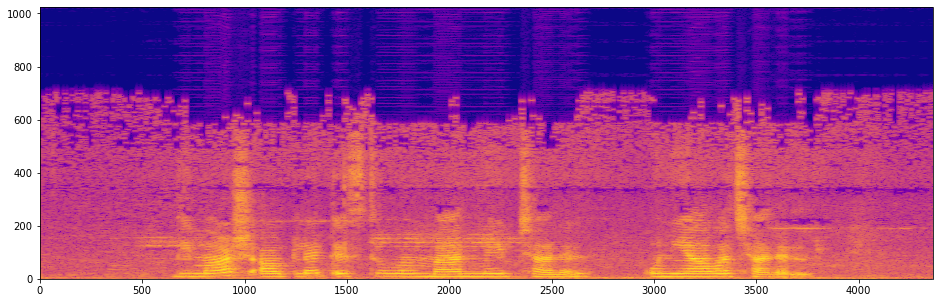

In [1]:
from DataLoader import DataLoader
dl = DataLoader()
dl.show_spectra(102)

In [ ]:
def trainGenerator(case_nums, batch_size):
    #takes data from begining of data set to 
    while True:
        for case_num in case_nums:
            volume, segmentation = load_case(case_num)
            #preprocessing input
            X_file = preprocess_X(volume)
            y_file, begining_num, end_num = preprocess_y(segmentation)
            X_file = X_file[begining_num:end_num+1, :, :]
            y_file = y_file[begining_num:end_num+1, :, :]
            L = X_file.shape[0]
            batch_start = 0
            batch_end = batch_size       
            while batch_start < L:
                limit = min(batch_end, L)
                X = X_file[batch_start:limit, :, :, :]
                y = y_file[batch_start:limit, :, :, :]                
                yield (tf.cast(X, dtype=tf.float16), tf.cast(y, dtype=tf.float16), [None])            
                batch_start += batch_size   
                batch_end += batch_size

            if case_num == case_nums[-1]:
                break